In [ ]:
import numpy as np
from matplotlib import pyplot as plt 

### regression revision by hand

In [136]:
def f(x, a=2.1, b=2.6):
    return a*x + b

np.random.seed(42)
# xi = np.random.rand(100, 1)
xi = np.linspace(-1,1,100).reshape(100,1)
noise = 0.01 * np.random.randn(100,1)
yi = f(xi) + noise

a = np.random.randn(1)
b = np.random.randn(1)

lr = 0.1
iterations = 1000
for _ in range(iterations):
    y_pred = a*xi + b
    error = y_pred - yi
    dl_da = (2 * xi * error ).mean()
    dl_db = (2 * error ).mean()
    a -= lr * dl_da
    b -= lr * dl_db
print('a={}, b={}'.format(a,b))

a=[2.10068966], b=[2.59896153]


### pytorch

In [127]:
import torch


torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float)
b = torch.randn(1, requires_grad=True, dtype=torch.float)

xi_tensor = torch.from_numpy(xi).float()
yi_tensor = torch.from_numpy(yi).float()

lr = 0.1
iterations = 1000
for _ in range(iterations):
    y_pred = a*xi_tensor + b
    # dl_da = (2 * xi * me(yi, y_pred) ).mean()
    # dl_db = (2 * me(yi, y_pred) ).mean()
    error = y_pred - yi_tensor
    loss = (error**2).mean()
    loss.backward()
    # print(a.grad, b.grad)
    with torch.no_grad():
        a -= lr * a.grad
        b -= lr * b.grad
    a.grad.zero_()
    b.grad.zero_()
print('a={}, b={}'.format(a.data,b.data))

a=tensor([2.1007]), b=tensor([2.5990])


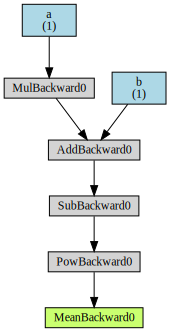

In [128]:
import torchviz
torch.manual_seed(42)

a = torch.randn(1, requires_grad=True, dtype=torch.float)
b = torch.randn(1, requires_grad=True, dtype=torch.float)

y_pred = a*xi_tensor + b 
error = y_pred - yi_tensor
loss = (error**2).mean()
torchviz.make_dot(loss, params={'a':a, 'b':b})

### + optimizer

In [129]:
from torch import optim

torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float)
b = torch.randn(1, requires_grad=True, dtype=torch.float)

xi_tensor = torch.from_numpy(xi).float()
yi_tensor = torch.from_numpy(yi).float()


lr = 0.1
iterations = 1000

optimizer = optim.SGD(params=[a,b],lr=lr)

for _ in range(iterations):
    y_pred = a*xi_tensor + b

    error = y_pred - yi_tensor
    loss = (error**2).mean()
    loss.backward()  # посчитали гралдиенты а б 

    optimizer.step() # вычли градиенты а б 
    optimizer.zero_grad() # обнулили градиенты, ибо торч их копит

print('a={}, b={}'.format(a.data,b.data))

a=tensor([2.1007]), b=tensor([2.5990])


### + loss

In [130]:
from torch import nn

torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float)
b = torch.randn(1, requires_grad=True, dtype=torch.float)

xi_tensor = torch.from_numpy(xi).float()
yi_tensor = torch.from_numpy(yi).float()


lr = 0.1
iterations = 1000

loss_fn = nn.MSELoss()
optimizer = optim.SGD(params=[a,b],lr=lr)

for _ in range(iterations):
    y_pred = a*xi_tensor + b # получили предсказания

    loss = loss_fn(y_pred, yi_tensor) # compute loss
    loss.backward()  # посчитали гралдиенты а б 

    optimizer.step() # вычли градиенты а б 
    optimizer.zero_grad() # обнулили градиенты, ибо торч их копит

print('a={}, b={}'.format(a.data,b.data))

a=tensor([2.1007]), b=tensor([2.5990])


### + model

In [131]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.a = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    def forward(self, x):
        return self.a * x + self.b

In [132]:
torch.manual_seed(42)


model = LinearRegression()

lr = 0.1
loss_fn = nn.MSELoss()
optimizer = optim.SGD(params=model.parameters(), lr=lr)
n_epochs = 1000
for _ in range(n_epochs):
    y_pred = model(xi_tensor)
    loss = loss_fn(y_pred, yi_tensor)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
print(model.state_dict())

OrderedDict([('a', tensor([2.1007])), ('b', tensor([2.5990]))])


### + nn.linear

In [133]:
class LinReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.ln = nn.Linear(1,1, bias=True)
    def forward(self, x):
        return self.ln(x)

In [134]:
torch.manual_seed(42)

model = LinReg()

lr = 0.1
loss_fn = nn.MSELoss()
optimizer = optim.SGD(params=model.parameters(), lr=lr)

n_epochs = 1000
for _ in range(n_epochs):
    y_pred = model(xi_tensor)
    loss = loss_fn(y_pred, yi_tensor)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
print(model.state_dict())

OrderedDict([('ln.weight', tensor([[2.1007]])), ('ln.bias', tensor([2.5990]))])


OrderedDict([('x1', tensor([2.2839])), ('x2', tensor([-3.2839]))])
f(x1) = -8.413530736106622e-06
f(x2) = -8.413530736106622e-06


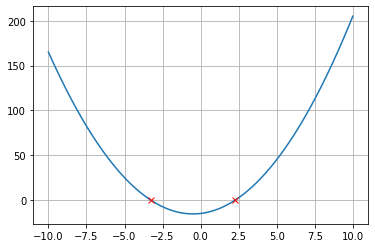

In [214]:
a = 2
def parabola(x, a=a,b=2,c=-15):
    return a*x**2 + b*x + c
N = 1000
X = np.linspace(-10,10,N).reshape(N,1)
X = torch.from_numpy(X).float()
Y = parabola(X)
plt.plot(X,Y)

torch.manual_seed(42)

class Parabola_fitter(nn.Module):
    def __init__(self, a=1):
        super().__init__()
        self.x1 = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.x2 = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.a = a
    def forward(self, x):
        return self.a*(x - self.x1) * (x - self.x2)

model = Parabola_fitter(a=a)

lr = 0.001
loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD(params=model.parameters(), lr=lr)

n_epochs = 1000
for _ in range(n_epochs):
    y_pred = model(X)
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
print(model.state_dict())
roots = np.array(list(model.state_dict().values()))
print('f(x1) = {}'.format(parabola(roots[0]) ))
print('f(x2) = {}'.format(parabola(roots[1]) ))

plt.plot(roots, parabola(roots), 'rx')
plt.grid(True)
plt.show()

In [196]:
np.array(list(model.state_dict().values()))

array([ 2.2360618, -2.2360618], dtype=float32)